In [13]:
!pip install opencv-python==4.5.3.56 numpy==1.19.5



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import cv2
print("j")

j


In [74]:
import matplotlib.pyplot as plt

In [75]:
config_file = "C:\\Users\\donjo\\OneDrive\\Desktop\\objectDetection\\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"

frozen_model="C:\\Users\\donjo\\OneDrive\\Desktop\\objectDetection\\frozen_inference_graph.pb"

In [76]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [77]:
class_labels=[]
file_name="C:\\Users\\donjo\\OneDrive\\Desktop\\objectDetection\\labels.txt"
with open(file_name,'rt') as fpt:
    classlabels=fpt.read().rstrip('\n').split('\n')
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [78]:
img=cv2.imread("C:\\Users\\donjo\\OneDrive\\Desktop\\objectDetection\\OIP.jpg")

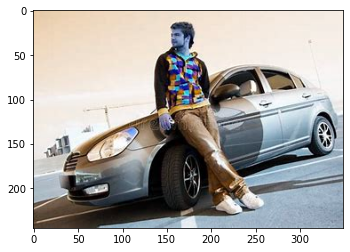

In [79]:
plt.imshow(img)

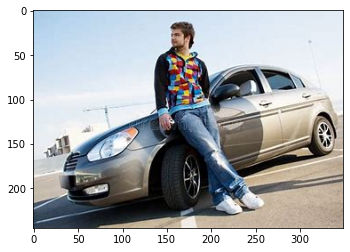

In [80]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [81]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 000001BE2A489A30>

In [112]:
classIndex,confidence,bbox=model.detect(img,confThreshold=0.6)

In [113]:
print(classIndex)

[[1]
 [3]
 [3]
 [3]]


In [84]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for classind,conf,boxes in zip(classIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(250,0,0),2)
    cv2.putText(img,classlabels[classind-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

In [114]:
classIndex,confidence,bbox=model.detect(img,confThreshold=0.7)

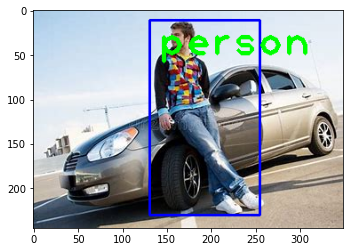

In [115]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [53]:
import cv2

cap = cv2.VideoCapture("C:\\Users\\donjo\\OneDrive\\Desktop\\objectDetection\\video_2023-12-14_16-55-32.mp4")

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video source.")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    if not ret:
        print("Error: Could not read frame.")
        break

    classIndex, confidence, bbox = model.detect(frame, confThreshold=0.5)

    print(classIndex)
    if len(classIndex) != 0:
        for classInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
            if (classInd<=80):
                cv2.rectangle(frame, boxes, (250, 0, 0), 2)
                cv2.putText(frame, classlabels[classInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    cv2.imshow("result", frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[[1]
 [6]
 [3]
 [1]
 [3]
 [3]
 [1]
 [1]]
[[1]
 [6]
 [3]
 [1]
 [3]
 [3]
 [1]
 [1]]
[[1]
 [6]
 [3]
 [1]
 [3]
 [3]
 [1]
 [1]]
[[1]
 [6]
 [3]
 [1]
 [3]
 [3]
 [1]
 [1]
 [3]]
[[1]
 [6]
 [3]
 [1]
 [3]
 [1]
 [3]
 [1]]
[[1]
 [6]
 [3]
 [1]
 [3]
 [1]
 [3]]
[[1]
 [3]
 [6]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [6]
 [1]
 [3]
 [1]
 [1]]
[[1]
 [6]
 [3]
 [1]
 [3]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [3]
 [1]
 [3]
 [1]]
[[1]
 [3]
 [6]
 [1]
 [3]
 [1]]
[[1]
 [3]
 [6]
 [1]
 [3]
 [1]
 [3]]
[[1]
 [3]
 [6]
 [1]
 [3]
 [1]
 [3]
 [1]]
[[3]
 [6]
 [1]
 [1]
 [3]
 [1]
 [1]
 [3]
 [3]
 [3]]
[[3]
 [6]
 [1]
 [1]
 [3]
 [1]
 [3]
 [1]
 [1]
 [3]]
[[3]
 [6]
 [1]
 [3]
 [1]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]]


In [35]:
cap = cv2.VideoCapture(0)

# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     raise IOError("Cannot open video source.")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()

    if not ret:
        print("Error: Could not read frame.")
        break

    classIndex, confidence, bbox = model.detect(frame, confThreshold=0.5)

    print(classIndex)
    if len(classIndex) != 0:
        for classInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
            if (classInd<=80):
                cv2.rectangle(frame, boxes, (250, 0, 0), 2)
                cv2.putText(frame, classlabels[classInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

    cv2.imshow("result", frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[[18]
 [60]]
[[ 1]
 [60]]
[[ 1]
 [60]]
[[1]]
[[18]
 [ 1]]
[[18]]
[[1]]
[[1]]
[[1]]
[[1]]
[[60]
 [ 1]]
[[60]
 [18]]
[[18]
 [60]]
[[ 1]
 [60]]
[[60]
 [18]]
[[ 1]
 [60]]
[[1]]
[[ 1]
 [60]]
[[ 1]
 [60]]
[[1]]
[[ 1]
 [60]]
[[ 1]
 [60]]
[[ 1]
 [60]]
[[60]
 [18]
 [ 1]]
[[ 1]
 [60]]
[[60]
 [ 1]]
[[60]
 [ 1]]
[[ 1]
 [60]]
[[ 1]
 [60]]
[[60]
 [18]
 [ 1]]
[[ 1]
 [60]]
[[60]
 [ 1]]
[[ 1]
 [60]]
[[60]
 [ 1]]
[[60]
 [ 1]
 [18]]
[[60]
 [18]
 [ 1]]
[[1]]
[[ 1]
 [60]]
[[ 1]
 [60]]
[[60]
 [ 1]]
[[ 1]
 [60]]
[[60]
 [ 1]
 [18]]
[[ 1]
 [18]]
[[ 1]
 [18]]
[[60]
 [ 1]
 [60]
 [18]]
[[ 1]
 [60]]
[[ 1]
 [60]]
[[ 1]
 [18]
 [60]]
[[60]
 [ 1]
 [18]]
[[ 1]
 [60]
 [18]]
[[60]
 [ 1]]
[[60]
 [ 1]]
[[60]
 [ 1]
 [60]
 [60]]
[[60]
 [60]
 [ 1]
 [60]
 [60]]
[[ 1]
 [60]
 [60]]
[[ 1]
 [60]
 [60]
 [75]]
[[60]
 [ 1]
 [60]]
[[60]
 [ 1]
 [60]]
[[ 1]
 [60]
 [60]
 [60]]
[[ 1]
 [60]
 [60]
 [60]
 [60]]
[[ 1]
 [60]
 [60]
 [60]]
[[ 1]
 [60]
 [60]
 [60]
 [60]]
[[ 1]
 [60]
 [60]]
[[ 1]
 [60]]
[[60]
 [ 1]
 [60]]
[[ 1]
 [60]
 [60]
 [60]]
